<a href="https://colab.research.google.com/github/Imaspson/PyTorchLearning/blob/main/01_PyTorch_Workflow_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

# Make agnostic code

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


# Create data

In [3]:
weight = 0.7
bias = 0.4

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.4000],
         [0.4070],
         [0.4140],
         [0.4210],
         [0.4280]]))

# Splitting data

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

# Create plot function

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

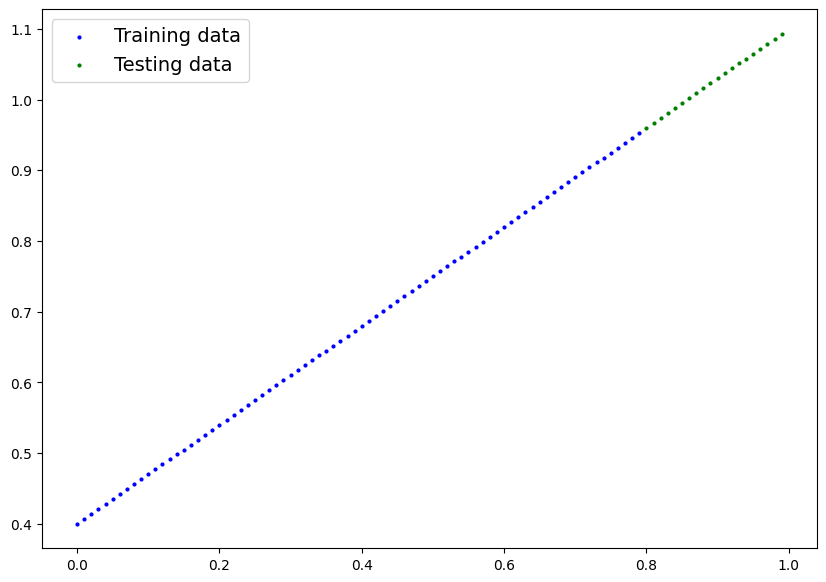

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

# Making the model

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

# Check the device

In [10]:
next(model.parameters()).device

device(type='cpu')

# Set our model to the GPU

In [11]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

# Training

In [12]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [13]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  #Training
  model.train()

  y_pred = model(X_train)

  loss = loss_function(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)

    test_loss = loss_function(test_pred, y_test)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.45550060272216797 | Test loss: 0.4742346704006195
Epoch: 20 | Train loss: 0.22429580986499786 | Test loss: 0.20352986454963684
Epoch: 40 | Train loss: 0.018104223534464836 | Test loss: 0.03548114374279976
Epoch: 60 | Train loss: 0.010698015801608562 | Test loss: 0.024371718987822533
Epoch: 80 | Train loss: 0.0038483645766973495 | Test loss: 0.008390671573579311
Epoch: 100 | Train loss: 0.006693247240036726 | Test loss: 0.009139331988990307
Epoch: 120 | Train loss: 0.006693247240036726 | Test loss: 0.009139331988990307
Epoch: 140 | Train loss: 0.006693247240036726 | Test loss: 0.009139331988990307
Epoch: 160 | Train loss: 0.006693247240036726 | Test loss: 0.009139331988990307
Epoch: 180 | Train loss: 0.006693247240036726 | Test loss: 0.009139331988990307
Epoch: 200 | Train loss: 0.006693247240036726 | Test loss: 0.009139331988990307
Epoch: 220 | Train loss: 0.006693247240036726 | Test loss: 0.009139331988990307
Epoch: 240 | Train loss: 0.006693247240036726 | Tes

In [14]:
from pprint import pprint

pprint("The model learned the following values for weight and bias:")
pprint(model.state_dict())
print("/nAnd the original values for weight and bias are:")
print(f"weight: {weight} | bias: {bias}")

'The model learned the following values for weight and bias:'
OrderedDict([('linear_layer.weight', tensor([[0.6954]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4085], device='cuda:0'))])
/nAnd the original values for weight and bias are:
weight: 0.7 | bias: 0.4


# Making predictions

In [15]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([[0.9648],
        [0.9718],
        [0.9787],
        [0.9857],
        [0.9926],
        [0.9996],
        [1.0066],
        [1.0135],
        [1.0205],
        [1.0274],
        [1.0344],
        [1.0413],
        [1.0483],
        [1.0552],
        [1.0622],
        [1.0691],
        [1.0761],
        [1.0831],
        [1.0900],
        [1.0970]], device='cuda:0')

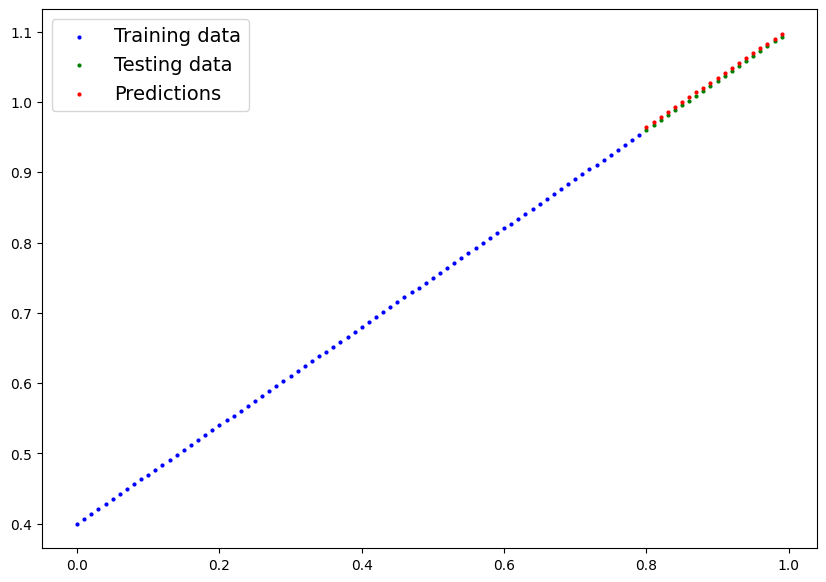

In [16]:
plot_predictions(predictions=y_preds.cpu())

# Saving and loading model

In [17]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_hw_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_hw_2.pth


In [20]:
loaded_model_1 = LinearRegressionModel()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

print(f"Loaded model: {loaded_model_1}")
print(f"Model on device: {next(loaded_model_1.parameters()).device}")

Loaded model: LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device: cuda:0


In [21]:
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')